In [1]:
import psycopg2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
from tqdm import tqdm # type: ignore
import numpy as np # type: ignore
import pandas as pd # type: ignore
import plotly.graph_objects as go # type: ignore
import yfinance as yf # type: ignore
import os
import warnings
warnings.filterwarnings("ignore")
os.chdir("../database")
open = pd.read_parquet('hk_price_open.parquet')
close = pd.read_parquet('hk_price_close.parquet')

/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [38]:

# momentum: ln(close_/open_)
time_ = "2020-01-01"; end_ = '2025-01-23'
open_ = open[time_:end_]
close_ = close[time_:end_]
ln_ = np.log(close_/open_).shift(1) # index: 使用的時間
pct_calculating_profit = close_/open_ # index: 當天收益

In [39]:
np.mean(ln_)

np.float64(-0.0005204059009992087)

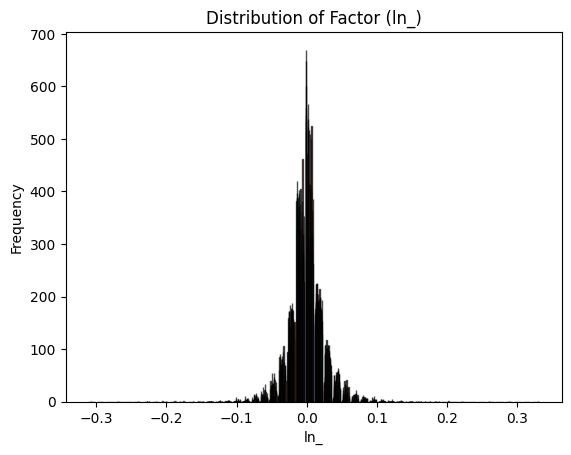

In [40]:
import matplotlib.pyplot as plt
plt.hist(ln_, bins=50, edgecolor='k', alpha=0.7)
plt.title("Distribution of Factor (ln_)")
plt.xlabel("ln_")
plt.ylabel("Frequency")
plt.show()


In [44]:
from scipy.stats import skew
skewness = skew(ln_.stack().values)
print(f"Skewness: {skewness}")


Skewness: 0.10500500403391722


Skewness: 0.10500500403391722
右偏分布：尾巴向右


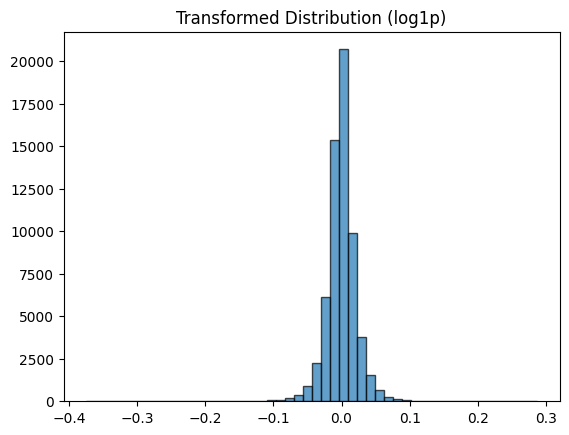

np.float64(-0.2756509081496109)

In [45]:
import numpy as np
from scipy.stats import skew

# 計算偏態係數
skewness = skew(ln_.stack().values)
print("Skewness:", skewness)

# 偏態分析結果
if skewness > 0:
    print("右偏分布：尾巴向右")
elif skewness < 0:
    print("左偏分布：尾巴向左")
else:
    print("對稱分布：無明顯偏態")

# 處理偏態（例如右偏分布取對數）
if skewness > 0:
    ln_transformed = np.log1p(ln_.stack().values)  # log1p 為 log(1+x)
    plt.hist(ln_transformed, bins=50, edgecolor='k', alpha=0.7)
    plt.title("Transformed Distribution (log1p)")
    plt.show()
skew(ln_transformed)

In [46]:
import numpy as np
import pandas as pd
from scipy.stats import skew

def keep_middle_quantile_df(df, lower_quantile=0.25, upper_quantile=0.75):
    # 計算分位數邊界
    lower_bound = np.percentile(df.stack().values, lower_quantile * 100)
    upper_bound = np.percentile(df.stack().values, upper_quantile * 100)
    # 使用 where 篩選，保留原結構
    filtered_df = df.where((df >= lower_bound) & (df <= upper_bound))
    return filtered_df

# 範例：處理 ln_ DataFrame
momentum_factor_middle_df = keep_middle_quantile_df(ln_)
# 計算篩選後的偏態（去除空值後計算）
filtered_values = momentum_factor_middle_df.stack().values
skewness_after_filtering = skew(filtered_values, nan_policy='omit')
print(f"Skewness after filtering: {skewness_after_filtering:.4f}")

# 顯示篩選後的 DataFrame
momentum_factor_middle_df


Skewness after filtering: -0.0011


Ticker,0001.HK,0002.HK,0003.HK,0005.HK,0006.HK,0011.HK,0016.HK,0027.HK,0175.HK,0291.HK,...,3968.HK,3988.HK,6030.HK,6690.HK,9618.HK,9633.HK,9868.HK,9888.HK,9961.HK,9988.HK
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,0.000000,0.005473,-0.002618,0.000821,0.001751,0.004325,-0.004211,NaN,NaN,NaN,...,NaN,0.005952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009569
2020-01-06 00:00:00+00:00,NaN,-0.006068,-0.003929,-0.008244,-0.001745,-0.010465,-0.010076,NaN,NaN,NaN,...,NaN,-0.005935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07 00:00:00+00:00,0.000680,-0.004277,-0.005249,-0.001665,-0.001745,-0.008077,NaN,-0.006001,NaN,0.000000,...,-0.008521,-0.009077,0.001118,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2020-01-08 00:00:00+00:00,NaN,0.000609,-0.006549,-0.004996,0.000000,-0.004957,-0.006814,NaN,0.006398,-0.003582,...,0.000000,-0.006079,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.003770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17 00:00:00+00:00,-0.003776,NaN,0.003339,0.005185,0.000978,0.004799,-0.007804,NaN,NaN,-0.006322,...,0.004796,0.005141,0.002407,0.007984,NaN,NaN,NaN,-0.005044,0.003918,0.004360
2025-01-20 00:00:00+00:00,NaN,NaN,0.008299,-0.001931,NaN,0.000532,0.000716,0.007968,NaN,NaN,...,-0.010863,-0.005141,NaN,NaN,NaN,0.001442,NaN,-0.002540,0.002928,0.009331
2025-01-21 00:00:00+00:00,-0.006215,0.006084,0.001651,0.004477,0.007663,0.005299,NaN,NaN,NaN,-0.010471,...,NaN,0.000000,-0.007067,0.003868,NaN,NaN,NaN,0.004963,NaN,NaN


In [16]:
# functions
def get_demean_weighting(factor):
    df1 = factor.dropna(axis='columns', how='all').copy()
    demean = df1.sub(df1.mean(axis=1), axis=0)
    weighting = demean.div(demean.abs().sum(axis=1), axis=0)
    return weighting
def _reweighting_equal(weighting:pd.DataFrame):
    def equal_weight(row: pd.Series):
        count_larger_than_zero = (row != 0).sum()
        if count_larger_than_zero > 0:
            row = row.apply(lambda x: 1 / count_larger_than_zero if x > 0 else x)
        return row
    return weighting.apply(equal_weight, axis=1)
def intraday_shifted_input_signal_pct_output_plot(ln_, pct_calculating_profit, quantile=10, type_='cumsum'):
        
    time_length = len(ln_)
    quantile_column = [[None]*quantile]*time_length
    quantile_df = pd.DataFrame(quantile_column)
    for da in range(time_length):
        row = ln_.iloc[da, :]
        col = row.sort_values(ascending=False).index
        for i in range(0, quantile):
            quantile_df.iloc[da, i] = list(col[i*int(len(row)/quantile):(i+1)*int(len(row)/quantile)])

    # pct_close_w_corres = pct_calculating_profit[pct_calculating_profit.columns.intersection(ln_.columns)].shift(-2)
    holdings = []
    index = ln_.index
    quantiles = [None] * quantile
    for qt_iter in range(quantile):
        quantile_1 = quantile_df.iloc[:, qt_iter]
        if qt_iter == 0: holdings = quantile_1
        df_1 = ln_.copy()
        for i in range(len(quantile_1)):
            df_1.loc[index[i], ~df_1.columns.isin(quantile_1[i])] = 0
        weighting_1 = -_reweighting_equal(df_1)
        ret = pct_calculating_profit.loc[weighting_1.index[0]:] * weighting_1
        if type_ == "cumsum":
            quantiles[qt_iter] = ret.sum(axis=1).cumsum()
        else:
            quantiles[qt_iter] = (1 + ret.sum(axis=1)).cumprod() - 1
    quantilized_cumsum = pd.DataFrame(quantiles).T
    fig = go.Figure()
    for i in range(len(quantilized_cumsum.columns)):
        fig.add_trace(go.Scatter(
            x=quantilized_cumsum.index,
            y=quantilized_cumsum.iloc[:, i],
            name=f"{i} th quantile",
            mode="lines",
            # line=dict(color="orange"),
            yaxis="y1"
        ))
    fig.show()
    # quantilized_cumsum.iloc[:, :].plot(title="10 quantile cumsum distribution")
    return holdings

In [62]:
# momentum: ln(open_/close_.shift(1)) 如果要更保守，就li_.shift(1)
time_ = "2017-01-01"; end_ = '2025-01-24'
open_ = open[time_:end_]
close_ = close[time_:end_]
ln_ = np.log(open_/close_.shift(1)) # index: 使用的時間
# ln_ = ln_[(ln_ > ln_.mean() - 3 * ln_.std()) & (ln_ < ln_.mean() + 3 * ln_.std())]
pct_calculating_profit = close_/open_-1 # index: 當天收益
holdings_gap = intraday_shifted_input_signal_pct_output_plot(ln_.fillna(0).shift(0), pct_calculating_profit.shift(0), quantile=10, type_='cumsum')

In [34]:
close_.iloc[-1][holdings_gap.iloc[-1]], holdings_gap.iloc[-1]

(Ticker
 0003.HK     5.92
 1088.HK    30.65
 Name: 2025-01-23 00:00:00+00:00, dtype: float64,
 ['0003.HK', '1088.HK'])

In [5]:
import pandas as pd

# 按五分位數分組
quantiles = pd.qcut(ln_, q=5, labels=False)  # 分組標籤：0, 1, 2, 3, 4

# 查看每組的樣本數量和平均值
group_stats = ln_.groupby(quantiles).agg(['count', 'mean', 'std', 'min', 'max'])
print(group_stats)

ValueError: Input array must be 1 dimensional

In [68]:

# momentum: ln(close_/open_)
time_ = "2017-01-01"; end_ = '2025-01-23'
open_ = open[time_:end_]
close_ = close[time_:end_]
ln_ = np.log(close_/open_).shift(1) # index: 使用的時間

# ln_ = ln_[(ln_ > ln_.mean() - 3 * ln_.std()) & (ln_ < ln_.mean() + 3 * ln_.std())]

pct_calculating_profit = close_/open_ # index: 當天收益
holdings = intraday_shifted_input_signal_pct_output_plot(ln_, pct_calculating_profit-1, quantile=10, type_='cumsum')